# Regular Expressions *(regex)*: XRDML file parser

## Background
Regular expressions (*regex*) is a text-based pattern recognition tool. It is developed to extract information from text and comes in very handy for machine-generated files, since such files are generally standardized and keep their format.  

In regex, patterns (consisting of a combination of regular- and metacharacters) are matched against strings. Many available token-/combinations make complex pattern often unreadable. [regex101](https://www.regex101.com) is a very useful page to dive into regular expressions and try it out interactively.


## Task
For this project, we want to write a regex-based file parser for XRDML files, a standardized XML-based format for XRD data. I have created a [shareable example](https://regex101.com/r/ddp03v/3) for the following exercise, in which the `sample name` is already exemplary matched. (Please note that the number of intensity counts in this online version is reduced for performance reasons.)


## Inputs:
- You can either download the XRDML files [here](https://hessenbox-a10.rz.uni-frankfurt.de/getlink/fi6WviJEF3n4FdeidUXDqW/xdrml) and, when you are using google colab, drag&grop them into your runtime environment, otherwise, if you are working locally, use the local path to the files.
- The file content can also be directly imported from the cloud using the `requests` module


## Steps:
- use the `re`, `pandas` and `matplotlib` modules
- define patterns that match and extract: `sample name`, `comment`, `begin 2Theta`, `end 2Theta`, `intensities`  
- write a file parser that makes use of implemented regex-based data extraction functions
- plot the XRD diffractogram


### First block is solved as example!

In [2]:
import re

'''
#import via file path
filePath = '/content/2023_0219_MB1_10.xrdml'
with open(filePath, 'r') as file:
    fileString = file.read()
'''
#import via hyperlink
import requests
url = "https://hessenbox-a10.rz.uni-frankfurt.de/dl/fi2ZisSCaud2xa8AqmJ6MN/2023_0219_MB1_10.xrdml"
fileString = str(requests.get(url).content.decode('utf-8'))

#print(fileString)

pattern_name = r'<sample.*>[\s\w]*<id>(.*)<\/id>'
re_name = re.compile(pattern_name)
print(re_name.findall(fileString))
# needs ...[0], because we want to access group[0] of our first match
match = re_name.findall(fileString)[0]

print(match)

['0219_MB1_10']
0219_MB1_10


Pattern explanation for `'<sample.*>\n\t*<id>(.*)<\/id>'`:

- `sample` matches "sample"
- `.` matches any character, `*` means `zero or more` times the character/expression defined before
- `>` matches the character ">"
- `[\s\w]*` matches any word and whitespace character 0-inf times (e.g., "space", "newline", "tab" or other entries within the \<sample\> argument)
- `<id>` matches "<id>"
- `(.*)` matches any character via `.` for `zero or more` times via `*`. The round brackets let us extract this information as a capturing group, i.e., the portion we want to extract ultimately.
- `<\/id>` matches `<\id>`, which represents the end of our pattern to be matched. Please note that a backslash `\` needs to be escaped `\/` in order to be recognized as a character.

Wrapped up:
- `<sample.*>` matches the sample tag including any attribute (in our case the ` type="To be analyzed"` portion)
- `[\W\w]*` matches any word and non-word character 0-inf times (e.g., "newline", "tab" or other entries within the \<sample\> argument)
- `<id>(.*)<\/id>` matches the `id` tag including everything `.*` within it. The round brackets around `(.*)` define a group, making it possible to extract just the information of interest (, i.e., the name itself) from within our pattern.



As next information we need to extract the `<intensities>...<\intensities>` entry, our y-axis data.

- define a pattern to grab intensity values as a capture group from within the `<intensities>...<\intensities>` tag
- use `findall()` to extract information from the capture group into a `match` variable
- create an empty list `y`
- write a loop to iteratively access individual intensities within `match` using `split()` and `append()` these as `float()` to `y`
-


In [3]:
pattern_intensities = re.compile(r"<intensities.*>(.*)<\/intensities>")
match = pattern_intensities.findall(fileString)[0]
y = [int(_) for _ in match.split(' ')]
print(y)

[1123, 1086, 1058, 1002, 1039, 963, 960, 969, 898, 944, 869, 864, 829, 817, 773, 715, 724, 707, 676, 664, 637, 681, 601, 567, 521, 542, 467, 428, 401, 372, 390, 338, 395, 353, 338, 340, 284, 305, 309, 274, 300, 321, 299, 313, 299, 307, 332, 322, 307, 281, 321, 335, 307, 303, 314, 327, 302, 335, 317, 237, 314, 284, 297, 290, 259, 319, 246, 307, 319, 282, 274, 284, 312, 267, 279, 274, 291, 291, 278, 246, 296, 264, 280, 290, 286, 289, 306, 283, 284, 276, 313, 321, 274, 316, 274, 295, 309, 313, 259, 289, 267, 288, 283, 276, 306, 294, 297, 286, 313, 324, 263, 257, 259, 283, 267, 265, 287, 270, 292, 291, 298, 275, 283, 254, 311, 270, 263, 313, 271, 280, 255, 273, 312, 262, 291, 317, 265, 225, 275, 287, 264, 273, 272, 287, 305, 281, 270, 283, 267, 287, 284, 256, 284, 288, 279, 239, 262, 298, 275, 296, 247, 275, 288, 256, 287, 255, 296, 287, 262, 291, 267, 249, 276, 272, 272, 266, 286, 243, 257, 265, 264, 254, 259, 273, 247, 267, 279, 279, 286, 263, 263, 279, 315, 265, 281, 262, 292, 283, 265,

The xrdml format stores 2Theta values (x-axis) using `StartPosition` and `EndPosition` as `xMin` and `xMax`, respectively.

- Define a pattern that contains two capture groups, which match both `StartPosition` and `EndPosition` and store the values in `xMin` and `xMax` variables.
- The x-array is generated using the `xMin` and `xMax` variables in combination with the number of measurements (`len(y)`). Create a list in which the number of values matches that of `y`, and the minimum and maximum values are `xMin` and `xMax`, respectively.


In [4]:
pattern_angles = re.compile(r'<positions axis="2Theta" unit="deg">[\W\w]*<startPosition>(\d{1,3}\.\d{1,9})<\/startPosition>[\W\w]*<endPosition>(\d{1,3}\.\d{1,9})<\/endPosition>')
match = pattern_angles.findall(fileString)[0]
xMin, xMax = float(match[0]), float(match[1])
xRange = xMax - xMin
xStep = xRange/(len(y)-1)
x = [i*xStep +xMin for i in range(len(y))]
print(x)


[1.25208891, 1.256266727266312, 1.2604445445326236, 1.2646223617989354, 1.268800179065247, 1.2729779963315588, 1.2771558135978707, 1.2813336308641823, 1.2855114481304941, 1.289689265396806, 1.2938670826631176, 1.2980448999294294, 1.302222717195741, 1.3064005344620528, 1.3105783517283647, 1.3147561689946763, 1.3189339862609881, 1.3231118035272997, 1.3272896207936116, 1.3314674380599234, 1.335645255326235, 1.3398230725925468, 1.3440008898588587, 1.3481787071251703, 1.3523565243914821, 1.3565343416577937, 1.3607121589241056, 1.3648899761904174, 1.369067793456729, 1.3732456107230409, 1.3774234279893527, 1.3816012452556643, 1.3857790625219761, 1.3899568797882877, 1.3941346970545996, 1.3983125143209114, 1.402490331587223, 1.4066681488535349, 1.4108459661198465, 1.4150237833861583, 1.4192016006524701, 1.4233794179187818, 1.4275572351850936, 1.4317350524514052, 1.435912869717717, 1.4400906869840289, 1.4442685042503405, 1.4484463215166523, 1.4526241387829641, 1.4568019560492758, 1.4609797733155

In a final step, create a function `parse_xrdml`, which takes `filePath` as input argument and returns `x`, `y` and `name` by copying the code fragments developed above. This enables us to easily plot multiple spectra within one plot.

- create a `list` containing the 3 filenames
- iterate over the `list`, invoke the function in every step to receive `x`,`y` and the sample name to plot the respective spectrum, taking the sample name as label
- create a legend & axis labels
- Please place `plt.show()` outside/behind the loop, in order to receive 1 plot with 3 spectra instead of 3 individual plots.

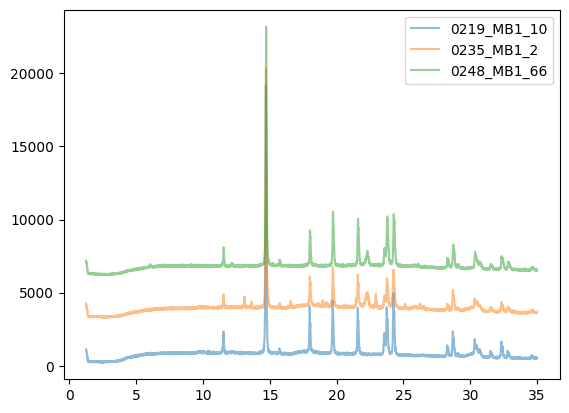

In [5]:
def parse_xrdml(filePath):
    if 'http' in filePath:
        fileString = str(requests.get(filePath).content.decode('utf-8'))
    else:
        with open(filePath, 'r') as file:
            fileString = file.read()

    pattern_name = re.compile(r'<sample.*>[\W\w]*<id>(.*)<\/id>')
    # needs ...[0], because we want to access the group of our first match
    match = pattern_name.findall(fileString)[0]
    name = match

    pattern_intensities = re.compile(r"<intensities.*>(.*)<\/intensities>")
    match = pattern_intensities.findall(fileString)[0]
    y = [int(_) for _ in match.split(' ')]

    pattern_angles = re.compile(r'<positions axis="2Theta" unit="deg">[\W\w]*<startPosition>(\d{1,3}\.\d{1,9})<\/startPosition>[\W\w]*<endPosition>(\d{1,3}\.\d{1,9})<\/endPosition>')
    match = pattern_angles.findall(fileString)[0]
    xMin, xMax = float(match[0]), float(match[1])
    xRange = xMax - xMin
    xStep = xRange/(len(y)-1)
    x = [i*xStep +xMin for i in range(len(y))]

    return x,y, name

import matplotlib.pyplot as plt

'''
files = [
    "/content/2023_0219_MB1_10.xrdml",
    "/content/2023_0235_MB1_2.xrdml",
    "/content/2023_0248_MB1_66.xrdml",
]
'''
files = [
    "https://hessenbox-a10.rz.uni-frankfurt.de/dl/fi2ZisSCaud2xa8AqmJ6MN/2023_0219_MB1_10.xrdml",
    "https://hessenbox-a10.rz.uni-frankfurt.de/dl/fiVFAV4oBe3jDaMwpCbgnD/2023_0235_MB1_2.xrdml",
    "https://hessenbox-a10.rz.uni-frankfurt.de/dl/fiQvuZbzZjfQPHKdqeg9TH/2023_0248_MB1_66.xrdml",
]



import numpy as np

OFFSET = 0
for file in files:
    x,y, id = parse_xrdml(file)
    plt.plot(x,np.array(y)+OFFSET,
             alpha=0.5,
             label=id)

    OFFSET+=3000
plt.legend()
plt.show()
